# Stonks 

Use tensorflow to build deep learning based time series forcasting models based on financial data.

Try out different neural network architectures, see which one works best for this task.

Keep track of the performance of all of the models.

Read the official Tensorflow time series forecasting [guide](https://www.tensorflow.org/tutorials/structured_data/time_series)

In [553]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import yfinance as yf

In [554]:
mpl.rcParams['figure.figsize'] = (16, 9)

### Dataset

Currently using `yfinance` to access yahoo finance historical data since it is free.

In [555]:
tickers = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG', 'TQQQ', 'TSLA', 'BABA', 'FCEL', 'JETS']
tickers

['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG', 'TQQQ', 'TSLA', 'BABA', 'FCEL', 'JETS']

In [646]:
def create_yfinance_df(tickers):
    return yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = '3mo',

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = '1d',

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )


In [647]:
multi_index_column_ticker_df = create_yfinance_df(tickers)

[*********************100%***********************]  10 of 10 completed


What do the first few entries look like? These should be the oldest.

In [648]:
multi_index_column_ticker_df.head()

AMZN                                                  \
                   Open         High          Low        Close   Volume   
Date                                                                      
2020-09-29  3175.389893  3188.260010  3132.540039  3144.879883  3495800   
2020-09-30  3141.139893  3212.879883  3133.989990  3148.729980  4883400   
2020-10-01  3208.000000  3224.000000  3172.000000  3221.260010  4971900   
2020-10-02  3153.629883  3195.800049  3123.000000  3125.000000  5613100   
2020-10-05  3145.840088  3202.530029  3140.850098  3199.199951  3775300   

                   GOOG                                                  ...  \
                   Open         High          Low        Close   Volume  ...   
Date                                                                     ...   
2020-09-29  1470.390015  1476.662964  1458.805054  1469.329956   978200  ...   
2020-09-30  1466.800049  1489.750000  1459.880005  1469.599976  1700600  ...   
2020-10-01  1484.270020  1499.040039  1479.209961  1490.089966  1779500  ...   
2020-10-02  1462.030029  1483.199951  1450.920044  1458.420044  1284100  ...   
2020-10-05  1466.209961  1488.209961  1464.270020  1486.020020  1113300  ...   

                  TSLA                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2020-09-29  416.000000  428.500000  411.600006  419.070007  50219300   
2020-09-30  421.320007  433.929993  420.470001  429.010010  48145600   
2020-10-01  440.760010  448.880005  434.420013  448.160004  50741500   
2020-10-02  421.390015  439.130005  415.000000  415.089996  71430000   
2020-10-05  423.350006  433.640015  419.329987  425.679993  44722800   

                  TQQQ                                                
                  Open        High         Low       Close    Volume  
Date                                                                  
2020-09-29  129.479996  130.839996  127.529999  128.360001  27725700  
2020-09-30  128.589996  135.520004  128.250000  130.899994  42101800  
2020-10-01  136.570007  138.070007  133.779999  137.029999  34834500  
2020-10-02  128.119995  133.630005  124.330002  125.730003  49944200  
2020-10-05  128.470001  134.100006  128.250000  133.660004  26348800  

[5 rows x 50 columns]

What do the last few entries look like? These should be the newest.

In [649]:
multi_index_column_ticker_df.tail()

AMZN                                                  \
                   Open         High          Low        Close   Volume   
Date                                                                      
2020-12-22  3202.840088  3222.000000  3180.080078  3206.520020  2369400   
2020-12-23  3205.000000  3210.129883  3184.169922  3185.270020  2093800   
2020-12-24  3193.899902  3202.000000  3169.000000  3172.689941  1451900   
2020-12-28  3194.000000  3304.000000  3172.689941  3283.959961  5674600   
2020-12-29  3309.939941  3350.625000  3281.222900  3323.389893  4293828   

                   GOOG                                                  ...  \
                   Open         High          Low        Close   Volume  ...   
Date                                                                     ...   
2020-12-22  1734.430054  1737.405029  1712.574951  1723.500000   936700  ...   
2020-12-23  1728.109985  1747.989990  1725.040039  1732.380005  1033800  ...   
2020-12-24  1735.000000  1746.000000  1729.109985  1738.849976   346800  ...   
2020-12-28  1751.635010  1790.728027  1746.334961  1776.089966  1392500  ...   
2020-12-29  1787.790039  1792.439941  1756.489990  1759.680054  1081724  ...   

                  TSLA                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2020-12-22  648.000000  649.880005  614.229980  640.340027  51716000   
2020-12-23  632.200012  651.500000  622.570007  645.979980  33173000   
2020-12-24  642.989990  666.090027  641.000000  661.770020  22865600   
2020-12-28  674.510010  681.400024  660.799988  663.690002  32133700   
2020-12-29  661.000000  669.900024  655.000000  665.228516  20323218   

                  TQQQ                                                
                  Open        High         Low       Close    Volume  
Date                                                                  
2020-12-22  175.300003  176.710007  170.179993  175.050003  20041300  
2020-12-23  175.039993  175.759995  172.179993  172.410004  14929300  
2020-12-24  172.910004  175.440002  172.720001  174.649994   9633200  
2020-12-28  179.160004  180.759995  176.029999  179.889999  14549400  
2020-12-29  182.350006  183.399994  178.809998  180.710007  14156313  

[5 rows x 50 columns]

In [650]:
multi_index_column_ticker_df.dtypes

AMZN  Open      float64
      High      float64
      Low       float64
      Close     float64
      Volume      int64
GOOG  Open      float64
      High      float64
      Low       float64
      Close     float64
      Volume      int64
FB    Open      float64
      High      float64
      Low       float64
      Close     float64
      Volume      int64
JETS  Open      float64
      High      float64
      Low       float64
      Close     float64
      Volume      int64
BABA  Open      float64
      High      float64
      Low       float64
      Close     float64
      Volume      int64
NFLX  Open      float64
      High      float64
      Low       float64
      Close     float64
      Volume      int64
AAPL  Open      float64
      High      float64
      Low       float64
      Close     float64
      Volume      int64
FCEL  Open      float64
      High      float64
      Low       float64
      Close     float64
      Volume      int64
TSLA  Open      float64
      High      

In [651]:
multi_index_column_ticker_df.describe().transpose()

count          mean           std           min           25%  \
AMZN Open     64.0  3.193053e+03  8.332903e+01  3.018530e+03  3.142718e+03   
     High     64.0  3.227963e+03  8.881166e+01  3.074900e+03  3.179540e+03   
     Low      64.0  3.149022e+03  8.010247e+01  2.950120e+03  3.103338e+03   
     Close    64.0  3.187689e+03  8.697835e+01  3.004480e+03  3.130498e+03   
     Volume   64.0  4.472532e+06  1.465471e+06  1.451900e+06  3.427125e+06   
GOOG Open     64.0  1.677033e+03  1.183843e+02  1.462030e+03  1.577275e+03   
     High     64.0  1.697402e+03  1.172257e+02  1.468960e+03  1.592782e+03   
     Low      64.0  1.661417e+03  1.179315e+02  1.436000e+03  1.559883e+03   
     Close    64.0  1.678684e+03  1.177221e+02  1.453440e+03  1.571048e+03   
     Volume   64.0  1.654718e+06  6.861161e+05  3.468000e+05  1.241300e+06   
FB   Open     64.0  2.739411e+02  8.049763e+00  2.578100e+02  2.682675e+02   
     High     64.0  2.774222e+02  8.158263e+00  2.601800e+02  2.712650e+02   
     Low      64.0  2.700337e+02  7.563486e+00  2.548200e+02  2.646050e+02   
     Close    64.0  2.738190e+02  8.282190e+00  2.581200e+02  2.673225e+02   
     Volume   64.0  1.857305e+07  6.869538e+06  6.702000e+06  1.427370e+07   
JETS Open     64.0  2.001600e+01  2.487622e+00  1.650000e+01  1.764000e+01   
     High     64.0  2.025216e+01  2.492211e+00  1.692000e+01  1.779750e+01   
     Low      64.0  1.970714e+01  2.415032e+00  1.634000e+01  1.744250e+01   
     Close    64.0  1.997711e+01  2.448384e+00  1.651000e+01  1.755000e+01   
     Volume   64.0  5.638325e+06  3.855579e+06  1.845000e+06  3.471571e+06   
BABA Open     64.0  2.793737e+02  2.277635e+01  2.168800e+02  2.633350e+02   
     High     64.0  2.828003e+02  2.318008e+01  2.249900e+02  2.652150e+02   
     Low      64.0  2.753138e+02  2.273974e+01  2.112300e+02  2.601775e+02   
     Close    64.0  2.792012e+02  2.281894e+01  2.220000e+02  2.629925e+02   
     Volume   64.0  2.185337e+07  2.091857e+07  6.231400e+06  1.133515e+07   
NFLX Open     64.0  5.056300e+02  2.139389e+01  4.709500e+02  4.878400e+02   
     High     64.0  5.133136e+02  2.155140e+01  4.840500e+02  4.945700e+02   
     Low      64.0  4.981880e+02  2.035589e+01  4.634100e+02  4.804600e+02   
     Close    64.0  5.058489e+02  2.102911e+01  4.705000e+02  4.879850e+02   
     Volume   64.0  5.065021e+06  2.593715e+06  1.144000e+06  3.586575e+06   
AAPL Open     64.0  1.195725e+02  5.962464e+00  1.089221e+02  1.155377e+02   
     High     64.0  1.211182e+02  5.964306e+00  1.104894e+02  1.167864e+02   
     Low      64.0  1.181190e+02  5.949084e+00  1.071352e+02  1.141183e+02   
     Close    64.0  1.196305e+02  6.067264e+00  1.085827e+02  1.155956e+02   
     Volume   64.0  1.151861e+08  3.972199e+07  4.669130e+07  8.688285e+07   
FCEL Open     64.0  5.111406e+00  3.433198e+00  1.950000e+00  2.285000e+00   
     High     64.0  5.530469e+00  3.744598e+00  2.020000e+00  2.380000e+00   
     Low      64.0  4.784531e+00  3.123595e+00  1.580000e+00  2.225000e+00   
     Close    64.0  5.168359e+00  3.411170e+00  1.890000e+00  2.315000e+00   
     Volume   64.0  5.768255e+07  5.885175e+07  6.367700e+06  1.568758e+07   
TSLA Open     64.0  5.017917e+02  9.437368e+01  3.940000e+02  4.224850e+02   
     High     64.0  5.129872e+02  9.810444e+01  4.069800e+02  4.314375e+02   
     Low      64.0  4.897873e+02  9.044673e+01  3.791100e+02  4.165750e+02   
     Close    64.0  5.033084e+02  9.797201e+01  3.880400e+02  4.217700e+02   
     Volume   64.0  4.400375e+07  2.675856e+07  1.735770e+07  3.131328e+07   
TQQQ Open     64.0  1.494483e+02  1.651263e+01  1.197900e+02  1.369975e+02   
     High     64.0  1.525286e+02  1.594831e+01  1.220900e+02  1.398425e+02   
     Low      64.0  1.457614e+02  1.676817e+01  1.135500e+02  1.335225e+02   
     Close    64.0  1.493038e+02  1.692911e+01  1.174500e+02  1.376750e+02   
     Volume   64.0  2.755306e+07  1.022475e+07  9.633200e+06  1.963750e+07   

                      50%         

We know that we currently have a multiindex dataframe, but I want to flatten this into a single flat dataframe so it is easier to work with. We can use `to_flat_index()` on our dataframe's columns to accomplish this.

In [652]:
print(type(multi_index_column_ticker_df.columns))

<class 'pandas.core.indexes.multi.MultiIndex'>


In [653]:
def flatten_multi_index_column_df(df):
    if type(df.columns) is not pd.core.indexes.multi.MultiIndex:
        raise Exception('provided dataframe does not have multiindex columns')
    tuple_column_flattener = lambda tup: f'{tup[0].lower()}_{tup[1].lower()}'
    flattened_columns = df.columns.to_flat_index().map(tuple_column_flattener)
    flattened_df = df.copy() # I don't like mutating the original dataframe, yes this more memory intensive
    flattened_df.columns = flattened_columns
    return flattened_df

In [654]:
flattened_df = flatten_multi_index_column_df(multi_index_column_ticker_df)

In [655]:
flattened_df.head()

,amzn_open,amzn_high,amzn_low,amzn_close,amzn_volume,goog_open,goog_high,goog_low,goog_close,goog_volume,...,tsla_open,tsla_high,tsla_low,tsla_close,tsla_volume,tqqq_open,tqqq_high,tqqq_low,tqqq_close,tqqq_volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29,3175.389893,3188.260010,3132.540039,3144.879883,3495800,1470.390015,1476.662964,1458.805054,1469.329956,978200,...,416.000000,428.500000,411.600006,419.070007,50219300,129.479996,130.839996,127.529999,128.360001,27725700
2020-09-30,3141.139893,3212.879883,3133.989990,3148.729980,4883400,1466.800049,1489.750000,1459.880005,1469.599976,1700600,...,421.320007,433.929993,420.470001,429.010010,48145600,128.589996,135.520004,128.250000,130.899994,42101800
2020-10-01,3208.000000,3224.000000,3172.000000,3221.260010,4971900,1484.270020,1499.040039,1479.209961,1490.089966,1779500,...,440.760010,448.880005,434.420013,448.160004,50741500,136.570007,138.070007,133.779999,137.029999,34834500
2020-10-02,3153.629883,3195.800049,3123.000000,3125.000000,5613100,1462.030029,1483.199951,1450.920044,1458.420044,1284100,...,421.390015,439.130005,415.000000,415.089996,71430000,128.119995,133.630005,124.330002,125.730003,49944200
2020-10-05,3145.840088,3202.530029,3140.850098,3199.199951,3775300,1466.209961,1488.209961,1464.270020,1486.020020,1113300,...,423.350006,433.640015,419.329987,425.679993,44722800,128.470001,134.100006,128.250000,133.660004,26348800


In [656]:
flattened_df.tail()

,amzn_open,amzn_high,amzn_low,amzn_close,amzn_volume,goog_open,goog_high,goog_low,goog_close,goog_volume,...,tsla_open,tsla_high,tsla_low,tsla_close,tsla_volume,tqqq_open,tqqq_high,tqqq_low,tqqq_close,tqqq_volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-22,3202.840088,3222.000000,3180.080078,3206.520020,2369400,1734.430054,1737.405029,1712.574951,1723.500000,936700,...,648.000000,649.880005,614.229980,640.340027,51716000,175.300003,176.710007,170.179993,175.050003,20041300
2020-12-23,3205.000000,3210.129883,3184.169922,3185.270020,2093800,1728.109985,1747.989990,1725.040039,1732.380005,1033800,...,632.200012,651.500000,622.570007,645.979980,33173000,175.039993,175.759995,172.179993,172.410004,14929300
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,1451900,1735.000000,1746.000000,1729.109985,1738.849976,346800,...,642.989990,666.090027,641.000000,661.770020,22865600,172.910004,175.440002,172.720001,174.649994,9633200
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,5674600,1751.635010,1790.728027,1746.334961,1776.089966,1392500,...,674.510010,681.400024,660.799988,663.690002,32133700,179.160004,180.759995,176.029999,179.889999,14549400
2020-12-29,3309.939941,3350.625000,3281.222900,3323.389893,4293828,1787.790039,1792.439941,1756.489990,1759.680054,1081724,...,661.000000,669.900024,655.000000,665.228516,20323218,182.350006,183.399994,178.809998,180.710007,14156313


In [657]:
flattened_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
amzn_open,64.0,3.193053e+03,8.332903e+01,3.018530e+03,3.142718e+03,3.190435e+03,3.221807e+03,3.467990e+03
amzn_high,64.0,3.227963e+03,8.881166e+01,3.074900e+03,3.179540e+03,3.211505e+03,3.263638e+03,3.496240e+03
amzn_low,64.0,3.149022e+03,8.010247e+01,2.950120e+03,3.103338e+03,3.141270e+03,3.176263e+03,3.424220e+03
amzn_close,64.0,3.187689e+03,8.697835e+01,3.004480e+03,3.130498e+03,3.185005e+03,3.217778e+03,3.443630e+03
amzn_volume,64.0,4.472532e+06,1.465471e+06,1.451900e+06,3.427125e+06,4.301614e+06,5.314775e+06,8.386400e+06
goog_open,64.0,1.677033e+03,1.183843e+02,1.462030e+03,1.577275e+03,1.734715e+03,1.771995e+03,1.824520e+03
goog_high,64.0,1.697402e+03,1.172257e+02,1.468960e+03,1.592782e+03,1.759055e+03,1.784587e+03,1.847200e+03
goog_low,64.0,1.661417e+03,1.179315e+02,1.436000e+03,1.559883e+03,1.722630e+03,1.755270e+03,1.822650e+03
goog_close,64.0,1.678684e+03,1.177221e+02,1.453440e+03,1.571048e+03,1.739880e+03,1.768048e+03,1.827990e+03
goog_volume,64.0,1.654718e+06,6.861161e+05,3.468000e+05,1.241300e+06,1.503750e+06,1.829800e+06,4.329100e+06


Now we have a dataset with flattened columns, but clearly there are `NaN` values for many of head values. This makes sense because some tickers have been trading longer than others, so they have more history. It is also clear that tickers listed more recently will have less historical data to work with.

For now I do not want to deal with choosing a way to interpolate these historical NaNs. I want a complete dataset to work with right now. I want to determine the first trading date that all of my selected tickers were trading at the same time. This is a simple straight forward approach, but the dataset will be trimmed to the first full valid trading date for this dataset.

In [658]:
flattened_df.count()

amzn_open      64
amzn_high      64
amzn_low       64
amzn_close     64
amzn_volume    64
goog_open      64
goog_high      64
goog_low       64
goog_close     64
goog_volume    64
fb_open        64
fb_high        64
fb_low         64
fb_close       64
fb_volume      64
jets_open      64
jets_high      64
jets_low       64
jets_close     64
jets_volume    64
baba_open      64
baba_high      64
baba_low       64
baba_close     64
baba_volume    64
nflx_open      64
nflx_high      64
nflx_low       64
nflx_close     64
nflx_volume    64
aapl_open      64
aapl_high      64
aapl_low       64
aapl_close     64
aapl_volume    64
fcel_open      64
fcel_high      64
fcel_low       64
fcel_close     64
fcel_volume    64
tsla_open      64
tsla_high      64
tsla_low       64
tsla_close     64
tsla_volume    64
tqqq_open      64
tqqq_high      64
tqqq_low       64
tqqq_close     64
tqqq_volume    64
dtype: int64

In [801]:
flattened_df = flattened_df.replace([np.inf, -np.inf], np.nan)

In [804]:
flattened_df = flattened_df.dropna()

In [806]:
any([flattened_df.isna().any(axis='columns').any(), flattened_df.isna().any(axis='rows').any()])

False

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

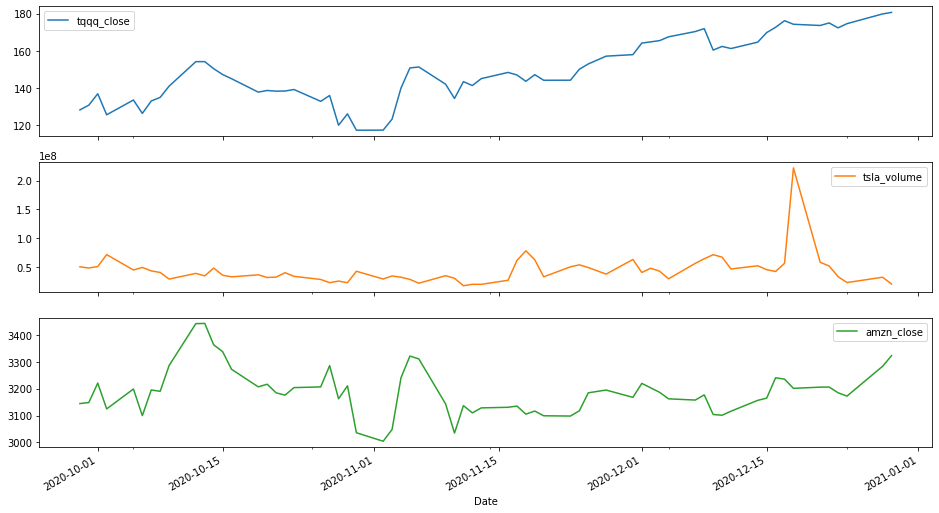

In [807]:
flattened_df[['tqqq_close', 'tsla_volume', 'amzn_close']].plot(subplots=True)

In [808]:
df = flattened_df.apply(lambda row: row.astype(np.float32))
df.dtypes

amzn_open      float32
amzn_high      float32
amzn_low       float32
amzn_close     float32
amzn_volume    float32
goog_open      float32
goog_high      float32
goog_low       float32
goog_close     float32
goog_volume    float32
fb_open        float32
fb_high        float32
fb_low         float32
fb_close       float32
fb_volume      float32
jets_open      float32
jets_high      float32
jets_low       float32
jets_close     float32
jets_volume    float32
baba_open      float32
baba_high      float32
baba_low       float32
baba_close     float32
baba_volume    float32
nflx_open      float32
nflx_high      float32
nflx_low       float32
nflx_close     float32
nflx_volume    float32
aapl_open      float32
aapl_high      float32
aapl_low       float32
aapl_close     float32
aapl_volume    float32
fcel_open      float32
fcel_high      float32
fcel_low       float32
fcel_close     float32
fcel_volume    float32
tsla_open      float32
tsla_high      float32
tsla_low       float32
tsla_close 

In [809]:
df.head()

,amzn_open,amzn_high,amzn_low,amzn_close,amzn_volume,goog_open,goog_high,goog_low,goog_close,goog_volume,...,tsla_open,tsla_high,tsla_low,tsla_close,tsla_volume,tqqq_open,tqqq_high,tqqq_low,tqqq_close,tqqq_volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29,3175.389893,3188.260010,3132.540039,3144.879883,3495800.0,1470.390015,1476.662964,1458.805054,1469.329956,978200.0,...,416.000000,428.500000,411.600006,419.070007,50219300.0,129.479996,130.839996,127.529999,128.360001,27725700.0
2020-09-30,3141.139893,3212.879883,3133.989990,3148.729980,4883400.0,1466.800049,1489.750000,1459.880005,1469.599976,1700600.0,...,421.320007,433.929993,420.470001,429.010010,48145600.0,128.589996,135.520004,128.250000,130.899994,42101800.0
2020-10-01,3208.000000,3224.000000,3172.000000,3221.260010,4971900.0,1484.270020,1499.040039,1479.209961,1490.089966,1779500.0,...,440.760010,448.880005,434.420013,448.160004,50741500.0,136.570007,138.070007,133.779999,137.029999,34834500.0
2020-10-02,3153.629883,3195.800049,3123.000000,3125.000000,5613100.0,1462.030029,1483.199951,1450.920044,1458.420044,1284100.0,...,421.390015,439.130005,415.000000,415.089996,71430000.0,128.119995,133.630005,124.330002,125.730003,49944200.0
2020-10-05,3145.840088,3202.530029,3140.850098,3199.199951,3775300.0,1466.209961,1488.209961,1464.270020,1486.020020,1113300.0,...,423.350006,433.640015,419.329987,425.679993,44722800.0,128.470001,134.100006,128.250000,133.660004,26348800.0


In [810]:
len(df.columns)

50

### Feature Engineering

#### Time

We want to account for seasonality in prices. We can map our `date` index feature datetimes into useable signals using sin and cos.

In [811]:
index_timestamp_seconds = np.array(df.index.map(datetime.datetime.timestamp)).astype(np.float32)
index_timestamp_seconds

array([1.6013519e+09, 1.6014385e+09, 1.6015247e+09, 1.6016113e+09,
       1.6018703e+09, 1.6019569e+09, 1.6020431e+09, 1.6021297e+09,
       1.6022159e+09, 1.6024753e+09, 1.6025615e+09, 1.6026481e+09,
       1.6027343e+09, 1.6028209e+09, 1.6030799e+09, 1.6031665e+09,
       1.6032527e+09, 1.6033393e+09, 1.6034255e+09, 1.6036849e+09,
       1.6037711e+09, 1.6038577e+09, 1.6039439e+09, 1.6040305e+09,
       1.6042932e+09, 1.6043796e+09, 1.6044660e+09, 1.6045524e+09,
       1.6046388e+09, 1.6048980e+09, 1.6049844e+09, 1.6050708e+09,
       1.6051572e+09, 1.6052436e+09, 1.6055028e+09, 1.6055892e+09,
       1.6056756e+09, 1.6057620e+09, 1.6058484e+09, 1.6061076e+09,
       1.6061940e+09, 1.6062804e+09, 1.6064532e+09, 1.6067124e+09,
       1.6067988e+09, 1.6068852e+09, 1.6069716e+09, 1.6070580e+09,
       1.6073172e+09, 1.6074036e+09, 1.6074900e+09, 1.6075764e+09,
       1.6076628e+09, 1.6079220e+09, 1.6080084e+09, 1.6080948e+09,
       1.6081812e+09, 1.6082676e+09, 1.6085268e+09, 1.6086132e

In [812]:
seconds_per_day = 24 * 60 * 60
seconds_per_year = 365.2425 * seconds_per_day
date_to_year_sin = np.sin(index_timestamp_seconds * (2 * np.pi / seconds_per_year))
date_to_year_cos = np.cos(index_timestamp_seconds * (2 * np.pi / seconds_per_year))

Text(0.5, 1.0, 'Time of year signal')

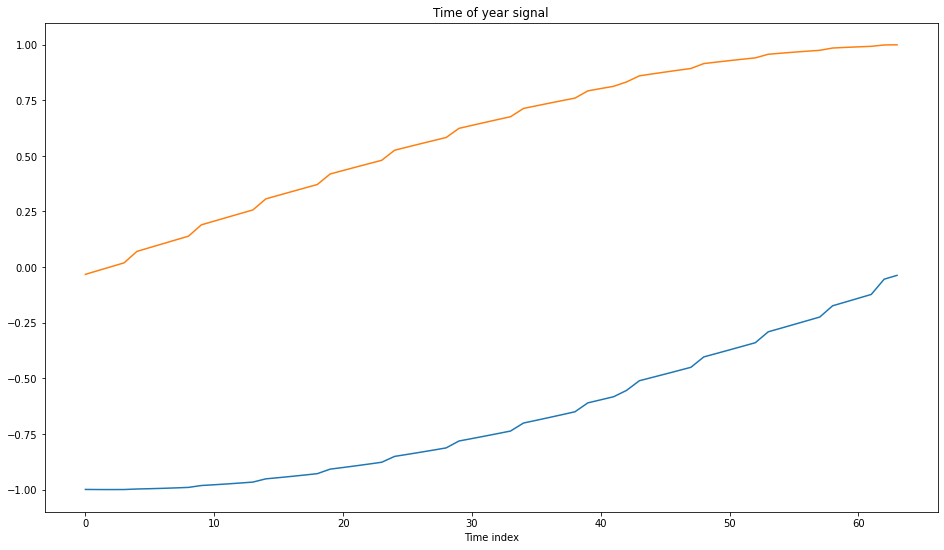

In [813]:
plt.plot(np.array(date_to_year_sin))
plt.plot(np.array(date_to_year_cos))
plt.xlabel('Time index')
plt.title('Time of year signal')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

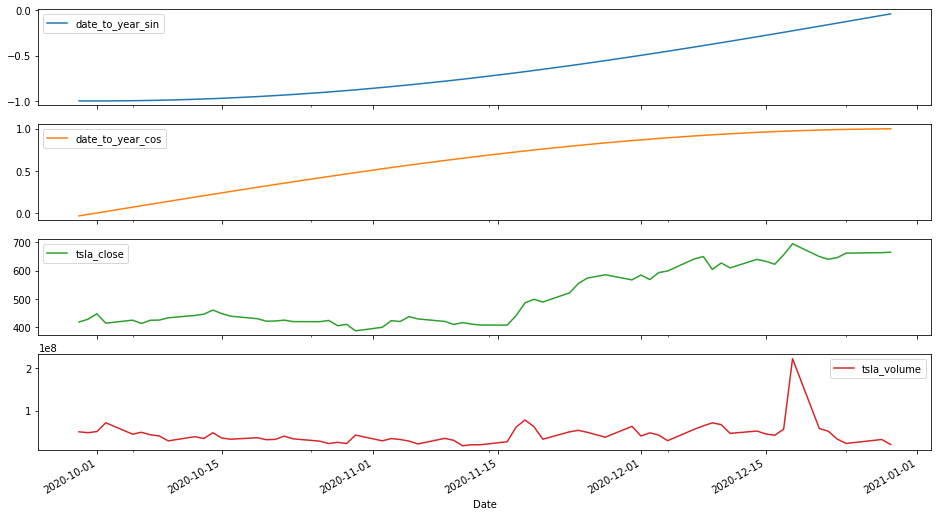

In [814]:
df['date_to_year_sin'] = date_to_year_sin
df['date_to_year_cos'] = date_to_year_cos
df[['date_to_year_sin', 'date_to_year_cos', 'tsla_close', 'tsla_volume']].plot(subplots=True)

In [815]:
df.dtypes

amzn_open           float32
amzn_high           float32
amzn_low            float32
amzn_close          float32
amzn_volume         float32
goog_open           float32
goog_high           float32
goog_low            float32
goog_close          float32
goog_volume         float32
fb_open             float32
fb_high             float32
fb_low              float32
fb_close            float32
fb_volume           float32
jets_open           float32
jets_high           float32
jets_low            float32
jets_close          float32
jets_volume         float32
baba_open           float32
baba_high           float32
baba_low            float32
baba_close          float32
baba_volume         float32
nflx_open           float32
nflx_high           float32
nflx_low            float32
nflx_close          float32
nflx_volume         float32
aapl_open           float32
aapl_high           float32
aapl_low            float32
aapl_close          float32
aapl_volume         float32
fcel_open           

### Split the data

We'll use a (70%, 20%, 10%) split for the training, validation, and test sets. Note the data is not being randomly shuffled before splitting. This is for two reasons.

It ensures that chopping the data into windows of consecutive samples is still possible.
It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.

In [816]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. Subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that we get (somewhat) honest metrics. So in the interest of simplicity this tutorial uses a simple average.

In [817]:
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

We can use a [violin plot](https://en.wikipedia.org/wiki/Violin_plot) to visualize the probability density of the data at different values. Using a [seaborn violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

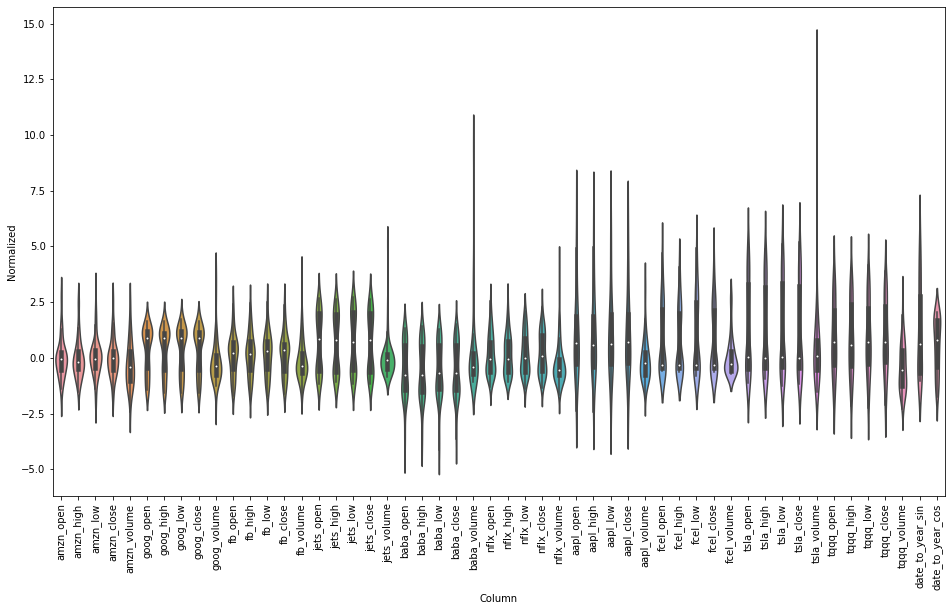

In [818]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure()
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Data windowing

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

* The width (number of time steps) of the input and label windows
* The time offset between them.
* Which features are used as inputs, labels, or both. 

This tutorial builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:

* *Single-output*, and *multi-output* predictions.
* *Single-time-step* and *multi-time-step* predictions.

This section focuses on implementing the data windowing so that it can be reused for all of those models.

In [819]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'
        ])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def plot(self, model=None, plot_col='tsla_close', max_subplots=3):
        inputs, labels = self.example
        plt.figure()
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [date]')
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

### Single step models



In [820]:
label_columns = ['tsla_close']

In [821]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=label_columns)
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['tsla_close']

In [822]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 52)
Labels shape (batch, time, features): (32, 1, 1)


#### baseline model

Need something simple to compare more complex models against

In [823]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [824]:
baseline = Baseline(label_index=column_indices[label_columns[0]])
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 893us/step - loss: 0.2807 - mean_absolute_error: 0.4543


In [825]:
wide_window = WindowGenerator(
    input_width=7, label_width=7, shift=1,
    label_columns=label_columns)

wide_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [1 2 3 4 5 6 7]
Label column name(s): ['tsla_close']

In [826]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 52)
Output shape: (32, 1, 1)


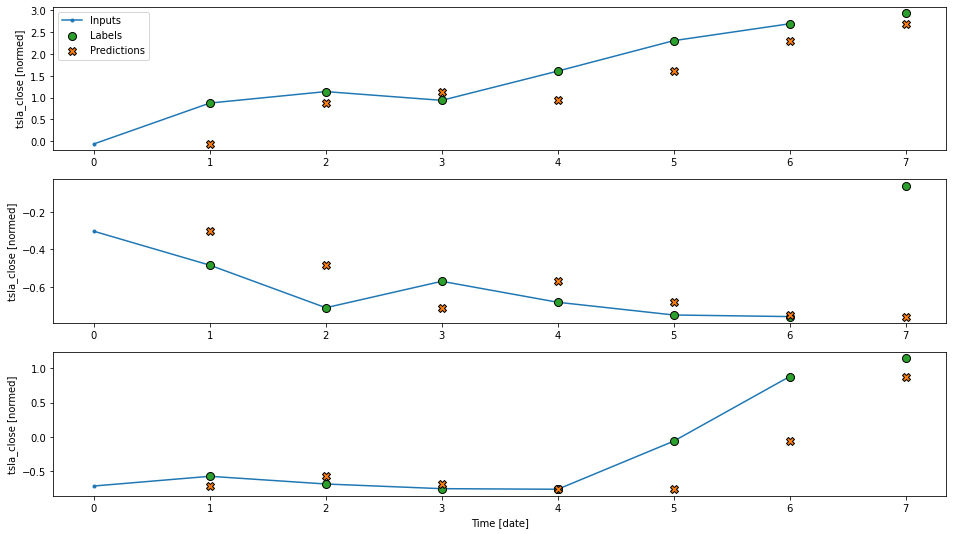

In [827]:
wide_window.plot(baseline)

In [828]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [829]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 52)
Output shape: (32, 1, 1)


In [853]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=0):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.SGD(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [854]:
%%time
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
2/2 [==============================] - 0s 48ms/step - loss: 1.1672 - mean_absolute_error: 0.7716 - val_loss: 4.2457 - val_mean_absolute_error: 1.8635
Epoch 2/50
2/2 [==============================] - 0s 20ms/step - loss: 0.9031 - mean_absolute_error: 0.6857 - val_loss: 5.1482 - val_mean_absolute_error: 2.0740
Epoch 3/50
2/2 [==============================] - 0s 21ms/step - loss: 0.7778 - mean_absolute_error: 0.6482 - val_loss: 3.7044 - val_mean_absolute_error: 1.7442
Epoch 4/50
2/2 [==============================] - 0s 24ms/step - loss: 0.6582 - mean_absolute_error: 0.5904 - val_loss: 4.2668 - val_mean_absolute_error: 1.8800
Epoch 5/50
2/2 [==============================] - 0s 20ms/step - loss: 0.5544 - mean_absolute_error: 0.5394 - val_loss: 4.3787 - val_mean_absolute_error: 1.9145
Epoch 6/50
1/1 [==============================] - 0s 730us/step - loss: 4.8394 - mean_absolute_error: 2.0358
CPU times: user 941 ms, sys: 42.6 ms, total: 983 ms
Wall time: 886 ms


In [855]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 7, 52)
Output shape: (32, 7, 1)


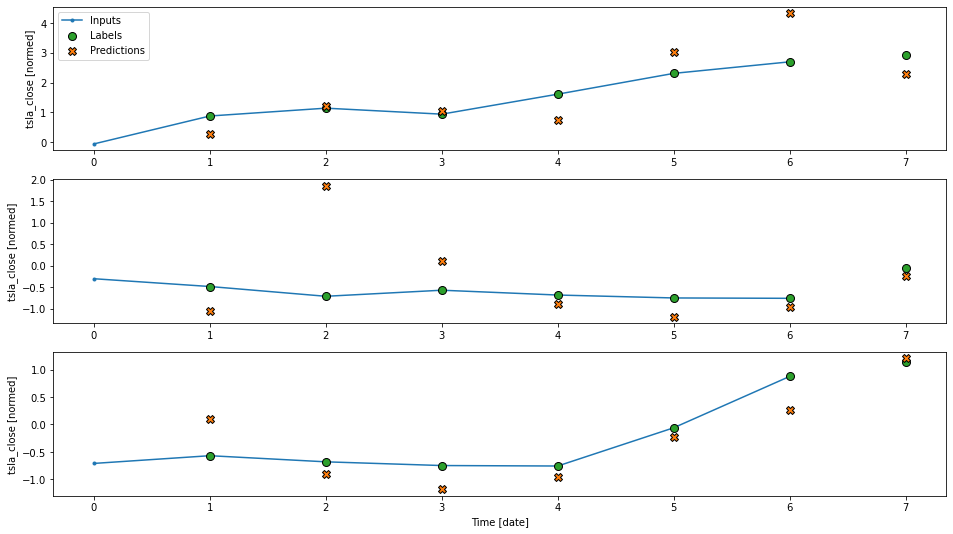

In [856]:
wide_window.plot(linear)

One advantage to linear models is that they're relatively simple to interpret. You can pull out the layer's weights, and see the weight assigned to each input:

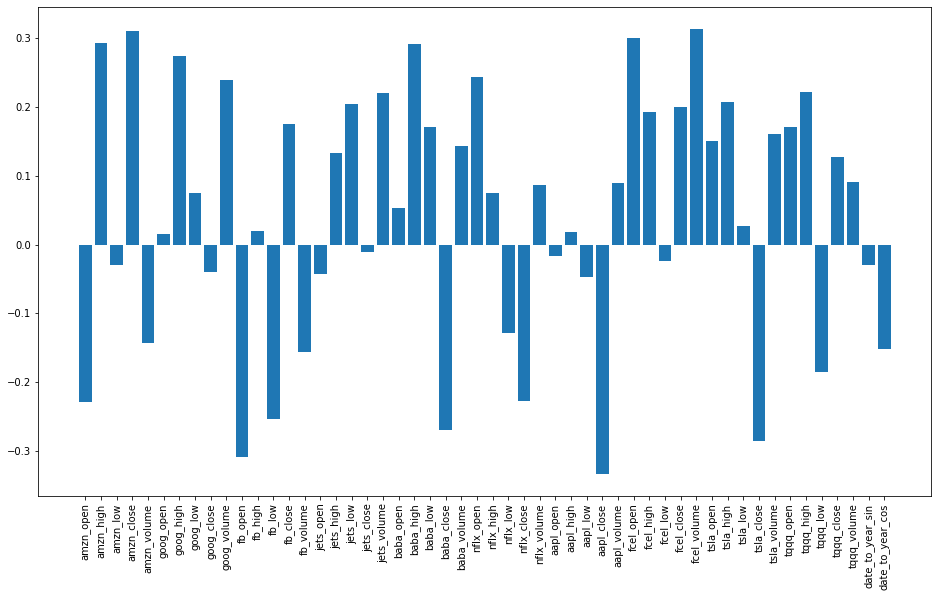

In [857]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

Sometimes the model doesn't even place the most weight on the input `tsla_close`. This is one of the risks of random initialization.

### Dense

In [858]:
%%time
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test)

Epoch 1/50
2/2 [==============================] - 0s 61ms/step - loss: 0.9626 - mean_absolute_error: 0.7412 - val_loss: 8.5409 - val_mean_absolute_error: 2.8645
Epoch 2/50
2/2 [==============================] - 0s 24ms/step - loss: 0.5653 - mean_absolute_error: 0.5897 - val_loss: 6.2652 - val_mean_absolute_error: 2.4342
Epoch 3/50
2/2 [==============================] - 0s 23ms/step - loss: 0.3770 - mean_absolute_error: 0.4884 - val_loss: 4.7042 - val_mean_absolute_error: 2.0896
Epoch 4/50
2/2 [==============================] - 0s 24ms/step - loss: 0.2767 - mean_absolute_error: 0.4287 - val_loss: 3.6988 - val_mean_absolute_error: 1.8322
Epoch 5/50
2/2 [==============================] - 0s 22ms/step - loss: 0.2138 - mean_absolute_error: 0.3703 - val_loss: 2.5968 - val_mean_absolute_error: 1.4994
Epoch 6/50
2/2 [==============================] - 0s 26ms/step - loss: 0.1752 - mean_absolute_error: 0.3433 - val_loss: 2.5412 - val_mean_absolute_error: 1.4807
Epoch 7/50
2/2 [==================

#### Multi-step dense

In [859]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=label_columns)

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['tsla_close']

Text(0.5, 1.0, 'Given 3 days as input, predict 1 day into the future.')

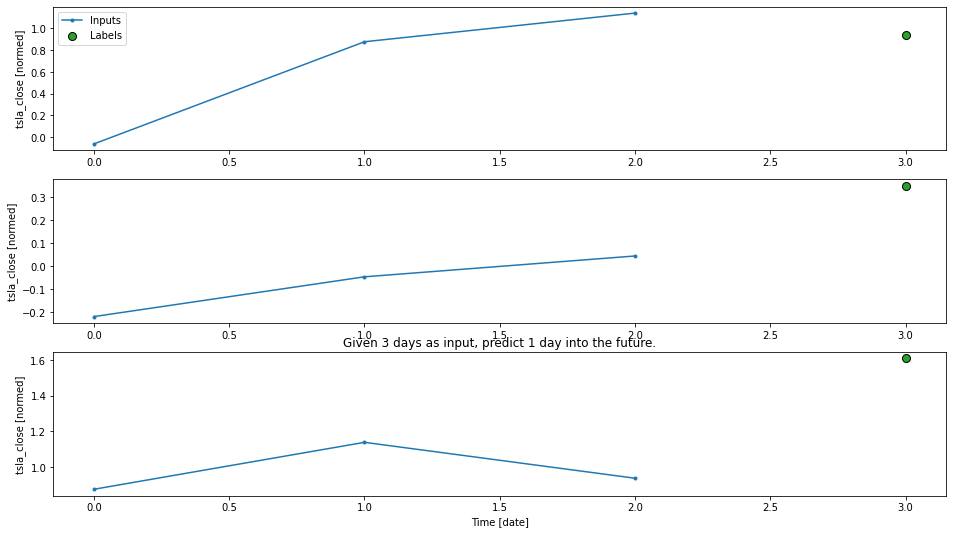

In [860]:
conv_window.plot()
plt.title("Given 3 days as input, predict 1 day into the future.")

You could train a dense model on a multiple-input-step window by adding a layers.Flatten as the first layer of the model

In [861]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [862]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 52)
Output shape: (32, 1, 1)


In [863]:
%%time
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test)

1/1 [==============================] - 0s 777us/step - loss: 2.0880 - mean_absolute_error: 1.3408
CPU times: user 1.22 s, sys: 58.9 ms, total: 1.28 s
Wall time: 1.13 s


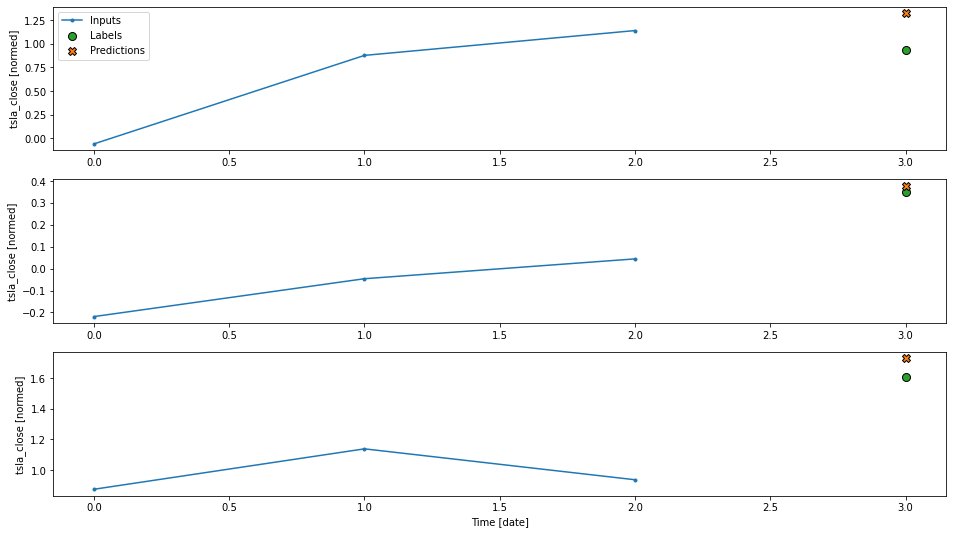

In [864]:
conv_window.plot(multi_step_dense)

The main down-side of this approach is that the resulting model can only be executed on input wndows of exactly this shape.

In [865]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 7, 52)

InvalidArgumentError:Matrix size-incompatible: In[0]: [32,364], In[1]: [156,32] [Op:MatMul]


### Convolution neural network

In [866]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [867]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 52)
Output shape: (32, 1, 1)


In [868]:
%%time
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 720us/step - loss: 2.4621 - mean_absolute_error: 1.4220
CPU times: user 2.04 s, sys: 108 ms, total: 2.15 s
Wall time: 1.86 s


In [869]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 7, 52)
Labels shape: (32, 7, 1)
Output shape: (32, 5, 1)


In [870]:
LABEL_WIDTH = 7
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=label_columns)

wide_conv_window

Total window size: 10
Input indices: [0 1 2 3 4 5 6 7 8]
Label indices: [3 4 5 6 7 8 9]
Label column name(s): ['tsla_close']

In [871]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 9, 52)
Labels shape: (32, 7, 1)
Output shape: (32, 7, 1)


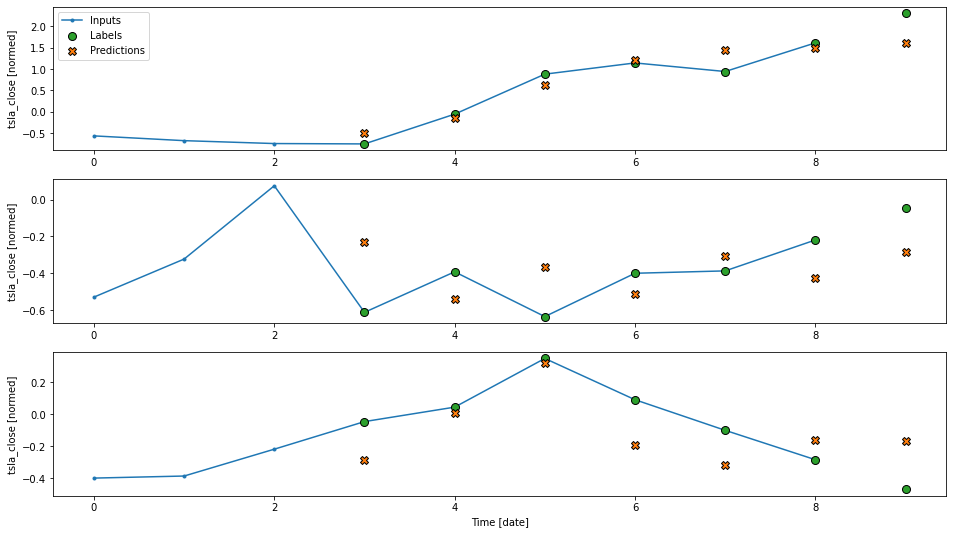

In [872]:
wide_conv_window.plot(conv_model)

### Recurrent neural network

In [873]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [874]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 7, 52)
Output shape: (32, 7, 1)


In [875]:
%%time
history = compile_and_fit(lstm_model, wide_window)
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test)

Epoch 1/50
2/2 [==============================] - 0s 154ms/step - loss: 0.6515 - mean_absolute_error: 0.6234 - val_loss: 9.0678 - val_mean_absolute_error: 2.9831
Epoch 2/50
2/2 [==============================] - 0s 23ms/step - loss: 0.5661 - mean_absolute_error: 0.5851 - val_loss: 8.5387 - val_mean_absolute_error: 2.8937
Epoch 3/50
2/2 [==============================] - 0s 24ms/step - loss: 0.4973 - mean_absolute_error: 0.5475 - val_loss: 7.8661 - val_mean_absolute_error: 2.7756
Epoch 4/50
2/2 [==============================] - 0s 25ms/step - loss: 0.4342 - mean_absolute_error: 0.5135 - val_loss: 7.6006 - val_mean_absolute_error: 2.7275
Epoch 5/50
2/2 [==============================] - 0s 23ms/step - loss: 0.3964 - mean_absolute_error: 0.4879 - val_loss: 7.1342 - val_mean_absolute_error: 2.6407
Epoch 6/50
2/2 [==============================] - 0s 22ms/step - loss: 0.3502 - mean_absolute_error: 0.4589 - val_loss: 6.8220 - val_mean_absolute_error: 2.5807
Epoch 7/50
2/2 [=================

/Users/alexanderlerma/go/src/github.com/neuralnetes/notebooks/nasdaq-traded/.venv/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:581: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

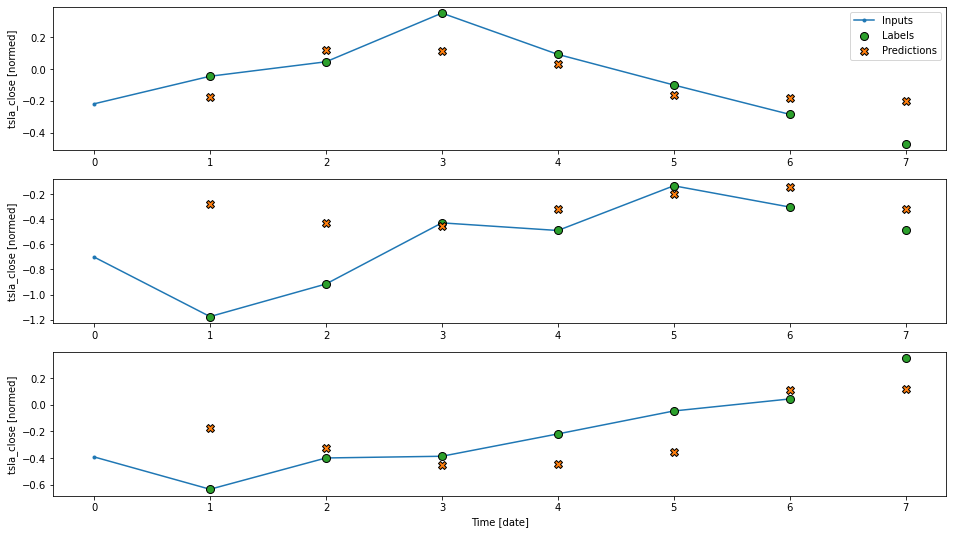

In [706]:
wide_window.plot(lstm_model)

### Performance

ValueError: shape mismatch: objects cannot be broadcast to a single shape

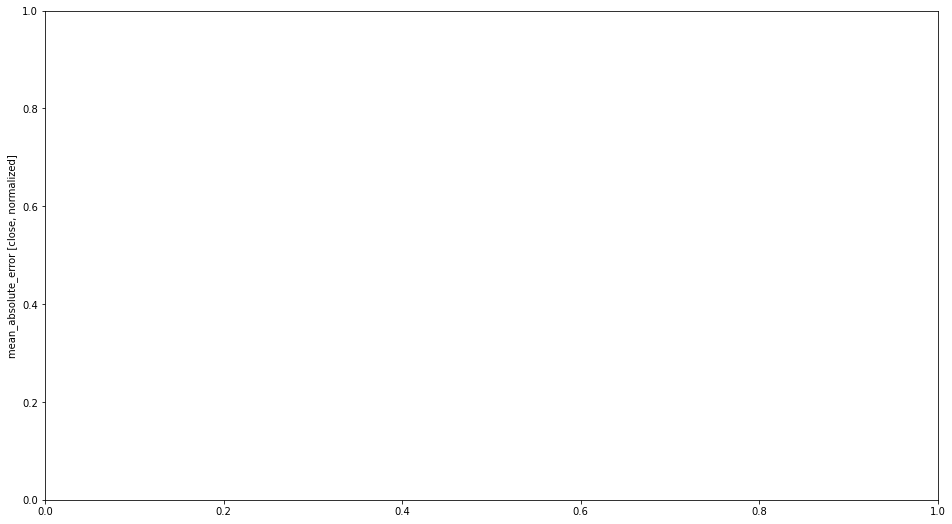

In [619]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [close, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [620]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.2761
Linear      : 1.0010
Dense       : 1.3020
Multi step dense: 2.9784
Conv        : 1.2288


### Multi Output Models

In [622]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=7, label_width=7, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 7, 62)
Labels shape (batch, time, features): (32, 7, 62)


In [623]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [624]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

1/1 [==============================] - 0s 740us/step - loss: 0.2028 - mean_absolute_error: 0.3105


In [625]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [626]:
%%time
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test)

1/1 [==============================] - 0s 740us/step - loss: 2.8699 - mean_absolute_error: 1.2377
CPU times: user 3.62 s, sys: 260 ms, total: 3.88 s
Wall time: 3.22 s


In [627]:
wide_window = WindowGenerator(
    input_width=7, label_width=7, shift=1)

In [628]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

In [629]:
%%time
history = compile_and_fit(lstm_model, wide_window)
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)


1/1 [==============================] - 0s 769us/step - loss: 2.2365 - mean_absolute_error: 1.1920
CPU times: user 5.22 s, sys: 406 ms, total: 5.63 s
Wall time: 4.67 s


In [630]:
class ResidualWrapper(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def call(self, inputs, *args, **kwargs):
        delta = self.model(inputs, *args, **kwargs)

        # The prediction for each timestep is the input
        # from the previous time step plus the delta
        # calculated by the model.
        return inputs + delta

In [631]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

1/1 [==============================] - 0s 700us/step - loss: 0.2025 - mean_absolute_error: 0.3097

CPU times: user 2.31 s, sys: 112 ms, total: 2.42 s
Wall time: 2.2 s


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

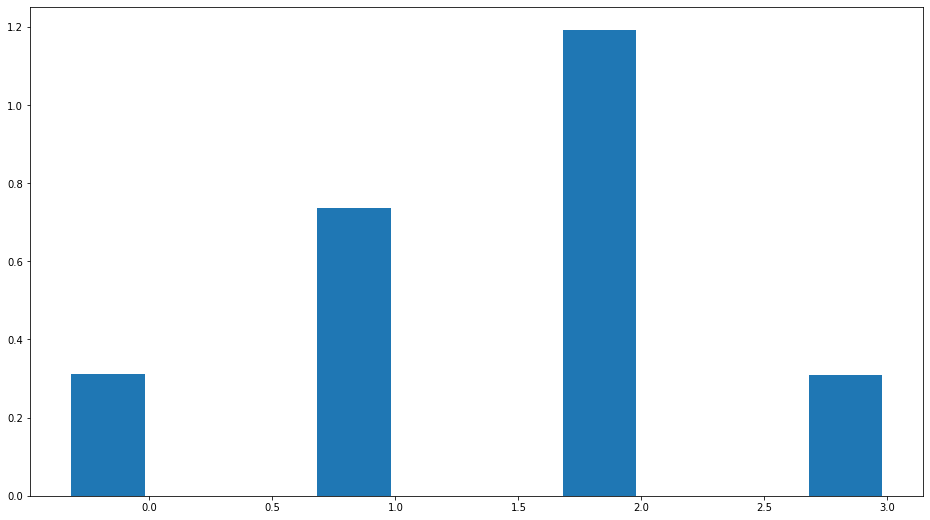

In [632]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

### Multi Step Models

Total window size: 14
Input indices: [0 1 2 3 4 5 6]
Label indices: [ 7  8  9 10 11 12 13]
Label column name(s): None

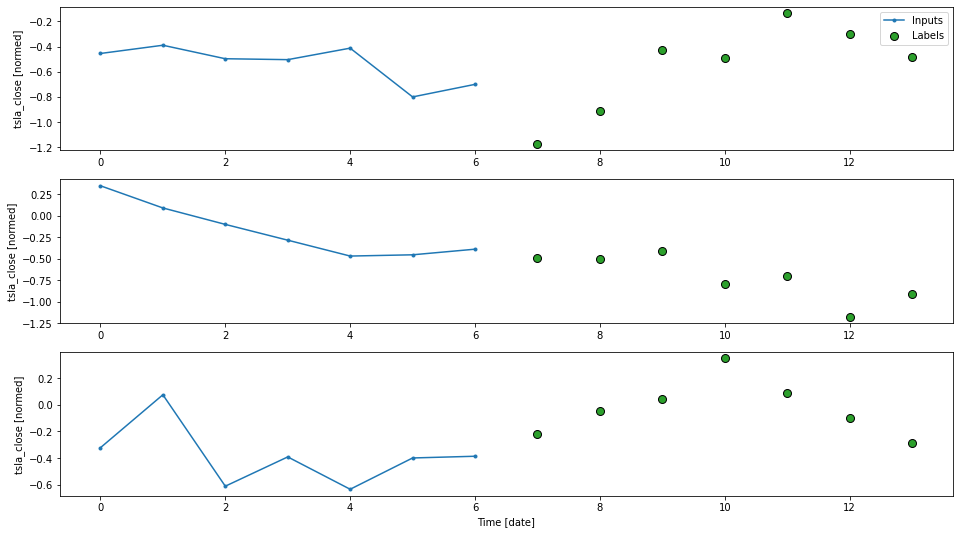

In [633]:
OUT_STEPS = 7
multi_window = WindowGenerator(input_width=7,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [634]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.val, verbose=0)
multi_window.plot(last_baseline)

/Users/alexanderlerma/go/src/github.com/neuralnetes/notebooks/nasdaq-traded/.venv/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:581: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [635]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

OverflowError: cannot convert float infinity to integer

### Single-shot models

In [ ]:
%%time
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)
IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

In [ ]:
pd.DataFrame(history.history).plot(subplots=True)

### Dense
Adding a layers.Dense between the input and output gives the linear model more power, but is still only based on a single input timestep.

In [ ]:
%%time
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

In [ ]:
pd.DataFrame(history.history).plot(subplots=True)

### CNN

In [ ]:
%%time
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

In [ ]:
pd.DataFrame(history.history).plot(subplots=True)

### RNN

In [ ]:
%%time
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [ ]:
pd.DataFrame(history.history).plot(subplots=True)

### Advanced: Autoregressive model

#### RNN

In [ ]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)
   
    def warmup(self, inputs):
        # inputs.shape => (batch, time, features)
        # x.shape => (batch, lstm_units)
        x, *state = self.lstm_rnn(inputs)

        # predictions.shape => (batch, features)
        prediction = self.dense(x)
        return prediction, state
    
    def call(self, inputs, training=None):
        # Use a TensorArray to capture dynamically unrolled outputs.
        predictions = []
        # Initialize the lstm state
        prediction, state = self.warmup(inputs)

        # Insert the first prediction
        predictions.append(prediction)

        # Run the rest of the prediction steps
        for n in range(1, self.out_steps):
            # Use the last prediction as input.
            x = prediction
            # Execute one lstm step.
            x, state = self.lstm_cell(x, states=state,
                                      training=training)
            # Convert the lstm output to a prediction.
            prediction = self.dense(x)
            # Add the prediction to the output
            predictions.append(prediction)

        # predictions.shape => (time, batch, features)
        predictions = tf.stack(predictions)
        # predictions.shape => (batch, time, features)
        predictions = tf.transpose(predictions, [1, 0, 2])
        return predictions

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

In [ ]:
%%time
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [ ]:
pd.DataFrame(history.history).plot(subplots=True)

### Reference Multi Step LSTM Models

[stacked-lstms-with-dropout](https://www.sciencedirect.com/science/article/pii/S1877050920304865)

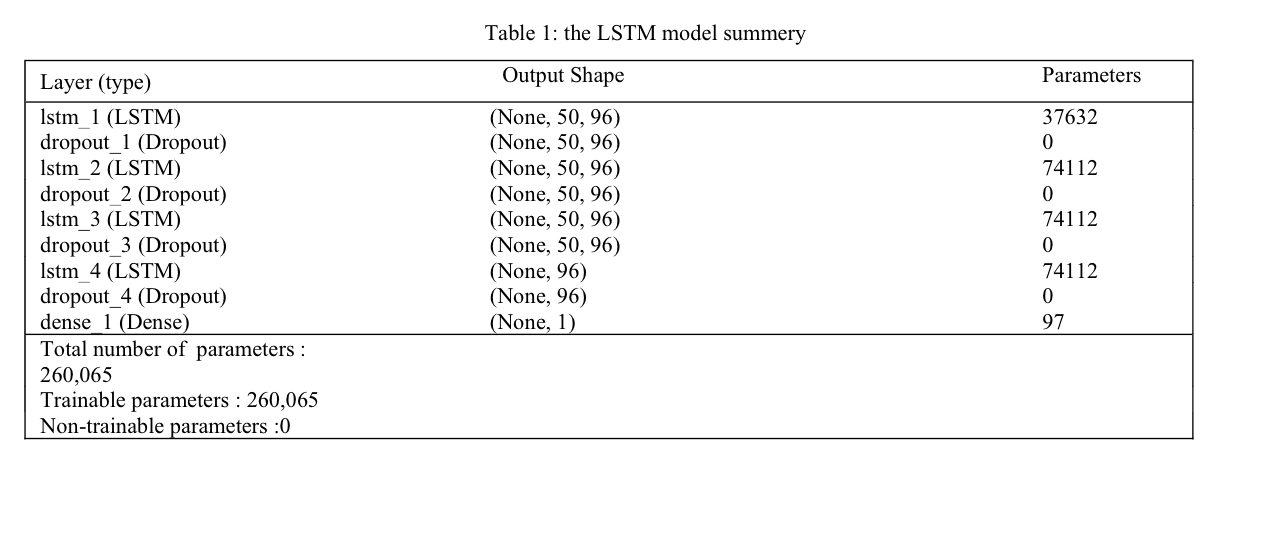

In [ ]:
%%time
stacked_lstm_dropout_reference_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.LSTM(96),
    tf.keras.layers.Dropout(0.20),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(stacked_lstm_dropout_reference_model, multi_window)

IPython.display.clear_output()
multi_val_performance['stacked_lstm_dropout_reference_model'] = stacked_lstm_dropout_reference_model.evaluate(multi_window.val)
multi_performance['stacked_lstm_dropout_reference_model'] = stacked_lstm_dropout_reference_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(stacked_lstm_dropout_reference_model)

In [ ]:
pd.DataFrame(history.history).plot(subplots=True)

### Custom Multi Step Models

Using a CNN with average pooling and dropout layer in front of stacked Bidirectional LSTM layers.

In [ ]:
%%time
custom_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.AveragePooling1D(1),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.20),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(custom_model, multi_window)

IPython.display.clear_output()
multi_val_performance['custom_model'] = custom_model.evaluate(multi_window.val)
multi_performance['custom_model'] = custom_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(custom_model)

In [ ]:
pd.DataFrame(history.history).plot(subplots=True)

### Performance

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
    print(f'{name:8s}: {value[1]:0.4f}')

Peeking at some other predictions made by the custom model... it predicts all features!

In [ ]:
for plot_col in ['aapl_close', 'amzn_open', 'spy_volume', 'wmt_close', 'tsla_volume', 'ge_close', 'tqqq_close', 'vz_volume']:
    multi_window.plot(custom_model, plot_col)

Store the trained model weights

In [ ]:
custom_model.save_weights('./checkpoints/custom-model')

### Making predictions with the saved model